* ## Data Preparation ##

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [2]:
data=pd.read_csv('../modified_Bank Customer Churn Prediction.csv')
data.head(10)

,Unnamed: 0,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,...,age_seg_B,age_seg_C,credit_score_seg,balance_seg,tenure_seg,age_group,gender_country,balance_salary_ratio,balance_credit_ratio,age_seg_A
0,0,619,France,Female,42,2,0.00,1,1,1,...,1,0,2,0,0,37-55,Female_France,0.000000,0.000000,0
1,1,608,Spain,Female,41,1,83807.86,1,0,1,...,1,0,2,1,0,37-55,Female_Spain,0.744677,137.841875,0
2,2,502,France,Female,42,8,159660.80,3,1,0,...,1,0,1,3,3,37-55,Female_France,1.401375,318.049402,0
3,3,699,France,Female,39,1,0.00,2,0,0,...,1,0,5,0,0,37-55,Female_France,0.000000,0.000000,0
4,4,850,Spain,Female,43,2,125510.82,1,1,1,...,1,0,6,2,0,37-55,Female_Spain,1.587055,147.659788,0
5,5,645,Spain,Male,44,8,113755.78,2,1,0,...,1,0,3,2,3,37-55,Male_Spain,0.759604,176.365550,0
6,6,822,France,Male,50,7,0.00,2,1,1,...,1,0,6,0,2,37-55,Male_France,0.000000,0.000000,0
7,8,501,France,Male,44,4,142051.07,2,0,1,...,1,0,1,3,1,37-55,Male_France,1.895518,283.535070,0
8,9,684,France,Male,27,2,134603.88,1,1,1,...,0,0,4,3,0,17-36,Male_France,1.876647,196.789298,1
9,10,528,France,Male,31,6,102016.72,2,0,0,...,0,0,1,2,2,17-36,Male_France,1.272328,193.213485,1


In [3]:
data.drop(columns=['Unnamed: 0','gender_Male','gender_num','country_Germany','country_Spain','balance_salary_ratio','balance_credit_ratio','age_group','gender_country'],axis=1,inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9574 entries, 0 to 9573
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9574 non-null   int64  
 1   country           9574 non-null   object 
 2   gender            9574 non-null   object 
 3   age               9574 non-null   int64  
 4   tenure            9574 non-null   int64  
 5   balance           9574 non-null   float64
 6   products_number   9574 non-null   int64  
 7   credit_card       9574 non-null   int64  
 8   active_member     9574 non-null   int64  
 9   estimated_salary  9574 non-null   float64
 10  churn             9574 non-null   int64  
 11  age_seg_B         9574 non-null   int64  
 12  age_seg_C         9574 non-null   int64  
 13  credit_score_seg  9574 non-null   int64  
 14  balance_seg       9574 non-null   int64  
 15  tenure_seg        9574 non-null   int64  
 16  age_seg_A         9574 non-null   int64  


### Use Pycaret To get better Algorithm for dataset ###

In [5]:
# from pycaret.classification import *

# # Step 1: Setup PyCaret
# clf_setup = setup(data=data, 
#                   target='Churn', 
#                   session_id=42, 
#                   normalize=True, 
#                   categorical_features=['country',	'gender'])

# best_model = compare_models()

# tuned_model = tune_model(best_model)

# evaluate_model(tuned_model)

# predictions = predict_model(tuned_model)

# save_model(tuned_model, 'best_churn_model')

In [6]:
x = data.drop(columns=['churn','credit_score_seg','balance_seg','tenure_seg','age_seg_A','age_seg_B','age_seg_C'], axis=1) #Feature
y = data['churn'] #Target
x.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
X = pd.get_dummies(x, columns=['country',
                                       'gender',
                                       'active_member',
                                       'credit_card'])

X.head()

,credit_score,age,tenure,balance,products_number,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male,active_member_0,active_member_1,credit_card_0,credit_card_1
0,619,42,2,0.00,1,101348.88,True,False,False,True,False,False,True,False,True
1,608,41,1,83807.86,1,112542.58,False,False,True,True,False,False,True,True,False
2,502,42,8,159660.80,3,113931.57,True,False,False,True,False,True,False,False,True
3,699,39,1,0.00,2,93826.63,True,False,False,True,False,True,False,True,False
4,850,43,2,125510.82,1,79084.10,False,False,True,True,False,False,True,False,True


In [8]:
X.shape , y.shape

((9574, 15), (9574,))

In [9]:
column_order = ['estimated_salary','credit_score','tenure','balance','age','country_Germany','country_Spain','country_France',
                'gender_Female','gender_Male','active_member_0','active_member_1','credit_card_0','credit_card_1']

X = X[column_order]
X.head()

,estimated_salary,credit_score,tenure,balance,age,country_Germany,country_Spain,country_France,gender_Female,gender_Male,active_member_0,active_member_1,credit_card_0,credit_card_1
0,101348.88,619,2,0.00,42,False,False,True,True,False,False,True,False,True
1,112542.58,608,1,83807.86,41,False,True,False,True,False,False,True,True,False
2,113931.57,502,8,159660.80,42,False,False,True,True,False,True,False,False,True
3,93826.63,699,1,0.00,39,False,False,True,True,False,True,False,True,False
4,79084.10,850,2,125510.82,43,False,True,False,True,False,False,True,False,True


* ## Modelling ##

In [10]:
%load_ext tensorboard


In [11]:
import datetime
import tensorflow as tf

# Setting up TensorBoard logging
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = 'logs/Models/' + current_time + '_evaluation'
summary_writer = tf.summary.create_file_writer(log_dir)

### Logistics Regression ###

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression()

# Fit model
lr_model.fit(X_train_scaled, y_train)

# Get binary predictions
y_pred = lr_model.predict(X_test_scaled)
accuracy= accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# AUC-ROC score, use the predicted probabilities
y_pred_prob_lr1 = lr_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for class 1 (churn)
auc_roc_lr1 = roc_auc_score(y_test, y_pred_prob_lr1)
print("AUC-ROC:", auc_roc_lr1)


Accuracy: 0.8273581621997912
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      2309
           1       0.64      0.28      0.39       564

    accuracy                           0.83      2873
   macro avg       0.74      0.62      0.64      2873
weighted avg       0.80      0.83      0.80      2873

AUC-ROC: 0.7949597473960972


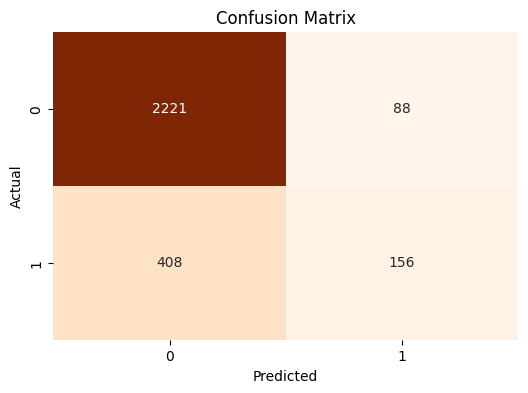

In [13]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import io
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

buf = io.BytesIO()  # Create a buffer to save the figure
plt.savefig(buf, format='png')  # Save the current figure to the buffer
plt.show()
plt.close()

image = tf.image.decode_png(buf.getvalue(), channels=4)
image = tf.expand_dims(image, 0)  # Add the batch dimension


In [14]:
import tensorflow as tf
# Log metrics to TensorBoard
with summary_writer.as_default():
    tf.summary.scalar('Accuracy_LogisticRegression', accuracy, step=1)
    tf.summary.scalar('AUC-ROC', auc_roc_lr1, step=1)
    tf.summary.image('Confusion Matrix', image, step=1)

print(f"TensorBoard logs created at: {log_dir}")

TensorBoard logs created at: logs/Models/20241007-032925_evaluation


## Add New Features ##

In [15]:
x = data.drop(columns=['churn','tenure_seg','age_seg_A','age_seg_B','age_seg_C','balance_seg','credit_score_seg'], axis=1) #Feature
y = data['churn'] #Target
x.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [16]:
X = pd.get_dummies(x, columns=['country','gender','active_member','credit_card','products_number','tenure','products_number'])

X.head()

,credit_score,age,balance,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male,active_member_0,...,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,products_number_1,products_number_2,products_number_3
0,619,42,0.00,101348.88,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,608,41,83807.86,112542.58,False,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,502,42,159660.80,113931.57,True,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,True
3,699,39,0.00,93826.63,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
4,850,43,125510.82,79084.10,False,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [17]:
X.shape, y.shape

((9574, 30), (9574,))

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

X_train, X_test, y_train, y_test_lr = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# use L1 Regularization (Lasso) which can help with feature selection
lr_model = LogisticRegression(solver="liblinear" ,penalty='l1')

# Fit the model to the training data
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test_lr,y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test_lr,y_pred)
print("Classification Report:\n", report)
# the AUC-ROC score, use the predicted probabilities
y_pred_prob_lr2 = lr_model.predict_proba(X_test_scaled)[:, 1] 
auc_roc_lr2 = roc_auc_score(y_test_lr, y_pred_prob_lr2) # Get probabilities for class 1 (churn)
print("AUC-ROC:", auc_roc_lr2)


Accuracy: 0.8569439610163592
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91      2309
           1       0.71      0.45      0.55       564

    accuracy                           0.86      2873
   macro avg       0.80      0.70      0.73      2873
weighted avg       0.85      0.86      0.84      2873

AUC-ROC: 0.8456878572591371


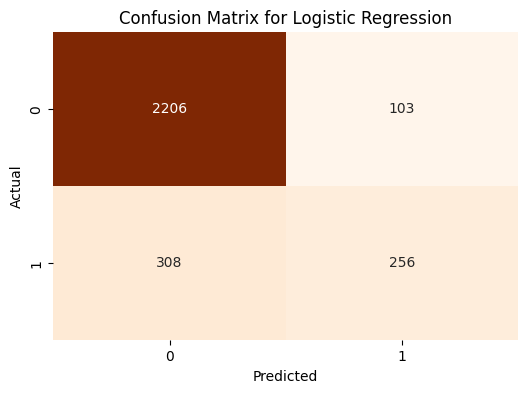

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test_lr, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

buf = io.BytesIO()  # Create a buffer to save the figure
plt.savefig(buf, format='png')  # Save the current figure to the buffer
plt.show()
plt.close()

image = tf.image.decode_png(buf.getvalue(), channels=4)
image = tf.expand_dims(image, 0)  # Add the batch dimension


In [20]:
import datetime
import tensorflow as tf
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = 'logs/Models/' + current_time + '_evaluation'
summary_writer = tf.summary.create_file_writer(log_dir)
# Log metrics to TensorBoard
with summary_writer.as_default():
    tf.summary.scalar('Accuracy_LogisticRegression', accuracy, step=1)
    tf.summary.scalar('AUC-ROC', auc_roc_lr2, step=1)
    tf.summary.image('Confusion Matrix', image, step=1)

print(f"TensorBoard logs created at: {log_dir}")

TensorBoard logs created at: logs/Models/20241007-032926_evaluation


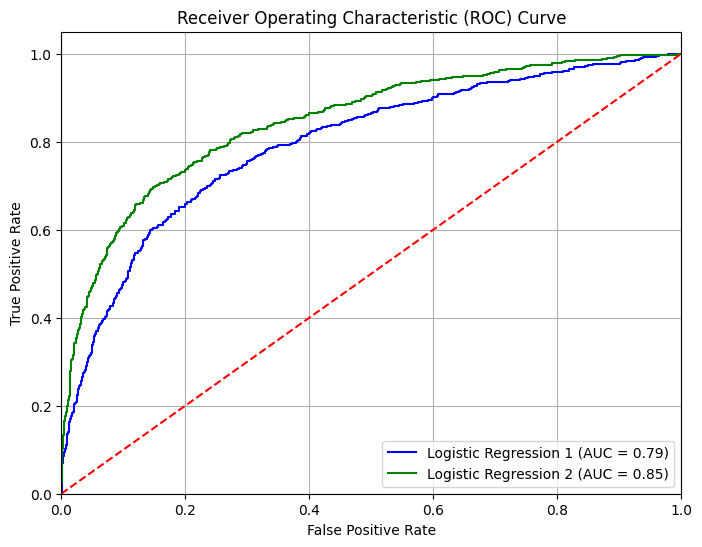

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC for Logistic Regression
fpr_lr1, tpr_lr1, _ = roc_curve(y_test, y_pred_prob_lr1)
roc_auc_lr1 = roc_auc_score(y_test, y_pred_prob_lr1)

# Compute ROC curve and AUC 
fpr_lr2, tpr_lr2, _ = roc_curve(y_test_lr, y_pred_prob_lr2)
roc_auc_lr2 = roc_auc_score(y_test_lr, y_pred_prob_lr2)

plt.figure(figsize=(8, 6))

# ROC for Logistic Regression
plt.plot(fpr_lr1, tpr_lr1, color='blue', label=f'Logistic Regression 1 (AUC = {roc_auc_lr1:.2f})')

plt.plot(fpr_lr2, tpr_lr2, color='green', label=f'Logistic Regression 2 (AUC = {roc_auc_lr2:.2f})')

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()

plt.show()


In [22]:
from sklearn.metrics import confusion_matrix
y_pred = lr_model.predict(X_test_scaled)

# Compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test_lr, y_pred).ravel()

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

tpr = tp / (tp + fn)  # True Positive Rate (Recall)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)

print(f"True Positive Rate (Recall): {tpr:.2f}")
print(f"False Positive Rate: {fpr:.2f}")
print(f"False Negative Rate (Precision): {fnr:.2f}")
print(f"True Negative Rate: {tnr:.2f}")

True Positives (TP): 256
False Positives (FP): 103
True Negatives (TN): 2206
False Negatives (FN): 308
True Positive Rate (Recall): 0.45
False Positive Rate: 0.04
False Negative Rate (Precision): 0.55
True Negative Rate: 0.96


### Support Vector Classifier ###

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_model = SVC(kernel='linear', probability=True) 

svc_model.fit(X_train_scaled, y_train)

# Predict class labels on the test set
y_pred = svc_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Evaluate the model performance
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

y_pred_prob_svc = svc_model.predict_proba(X_test_scaled)[:, 1]
auc_roc_svc = roc_auc_score(y_test, y_pred_prob_svc)
print("AUC-ROC:", auc_roc_svc)



Accuracy: 0.8565958927949878
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      2309
           1       0.80      0.36      0.49       564

    accuracy                           0.86      2873
   macro avg       0.83      0.67      0.71      2873
weighted avg       0.85      0.86      0.83      2873

AUC-ROC: 0.8424731009402


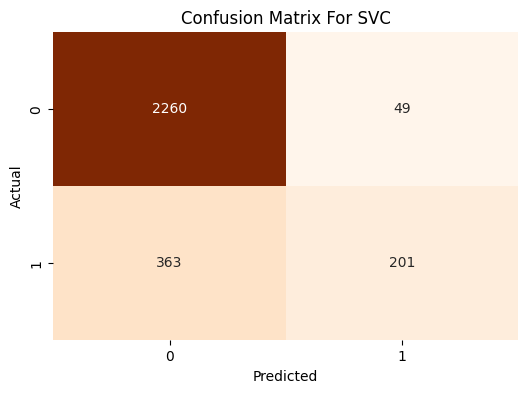

In [24]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix For SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')

buf = io.BytesIO()  # Create a buffer to save the figure
plt.savefig(buf, format='png')  # Save the current figure to the buffer
plt.show()
plt.close()

image = tf.image.decode_png(buf.getvalue(), channels=4)
image = tf.expand_dims(image, 0)  # Add the batch dimension

In [25]:
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = 'logs/Models/' + current_time + '_evaluation'
summary_writer = tf.summary.create_file_writer(log_dir)
# Log metrics to TensorBoard
with summary_writer.as_default():
    tf.summary.scalar('Accuracy_SupportVectorClassifier', accuracy, step=1)
    tf.summary.scalar('AUC-ROC', auc_roc_svc, step=1)
    tf.summary.image('Confusion Matrix', image, step=1)

print(f"TensorBoard logs created at: {log_dir}")

TensorBoard logs created at: logs/Models/20241007-032930_evaluation


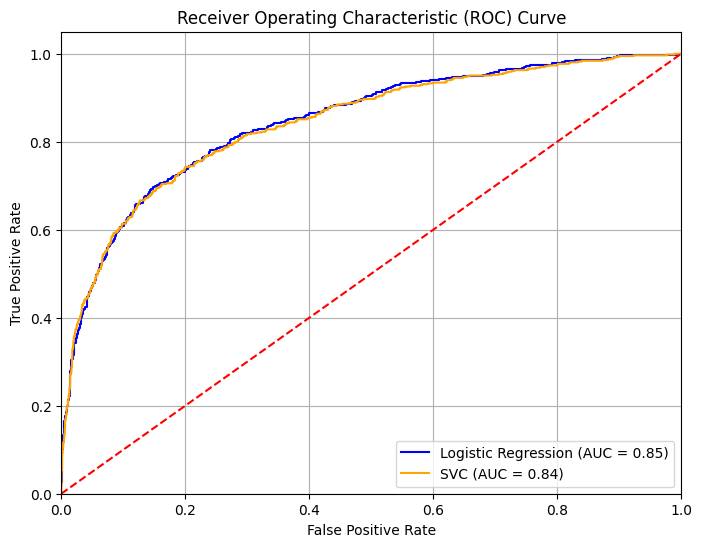

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC for Logistic Regression
fpr_lr2, tpr_lr2, _ = roc_curve(y_test_lr, y_pred_prob_lr2)
roc_auc_lr2 = roc_auc_score(y_test_lr, y_pred_prob_lr2)

# Compute ROC curve and AUC for SVC
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_prob_svc)
roc_auc_svc = roc_auc_score(y_test, y_pred_prob_svc)

# Plot ROC curves
plt.figure(figsize=(8, 6))

# ROC for Logistic Regression
plt.plot(fpr_lr2, tpr_lr2, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr2:.2f})')

# ROC for SVC
plt.plot(fpr_svc, tpr_svc, color='Orange', label=f'SVC (AUC = {roc_auc_svc:.2f})')

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()

plt.show()

### Gradient Boosting Classifier ###

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)  # Get probabilities for class 1 (e.g., churn)
print("AUC-ROC:", auc_roc)

Accuracy: 0.8649495301079011
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2309
           1       0.74      0.48      0.58       564

    accuracy                           0.86      2873
   macro avg       0.81      0.72      0.75      2873
weighted avg       0.86      0.86      0.85      2873

AUC-ROC: 0.8637516164008243


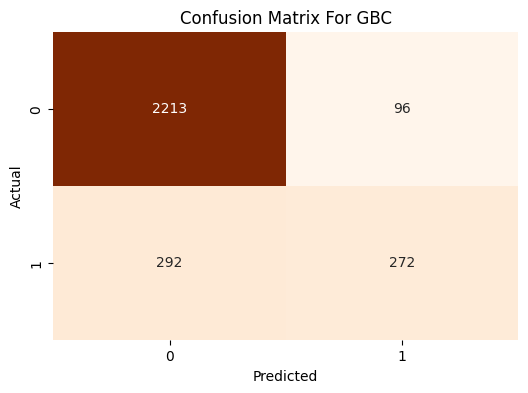

In [28]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix For GBC')
plt.xlabel('Predicted')
plt.ylabel('Actual')

buf = io.BytesIO()  # Create a buffer to save the figure
plt.savefig(buf, format='png')  # Save the current figure to the buffer
plt.show()
plt.close()

image = tf.image.decode_png(buf.getvalue(), channels=4)
image = tf.expand_dims(image, 0)  # Add the batch dimension

In [29]:
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = 'logs/Models/' + current_time + '_evaluation'
summary_writer = tf.summary.create_file_writer(log_dir)
# Log metrics to TensorBoard
with summary_writer.as_default():
    tf.summary.scalar('Accuracy_GradientBoostingClassifier', accuracy, step=1)
    tf.summary.scalar('AUC-ROC', auc_roc, step=1)
    tf.summary.image('Confusion Matrix', image, step=1)

print(f"TensorBoard logs created at: {log_dir}")

TensorBoard logs created at: logs/Models/20241007-032931_evaluation


### Performance GBC by using GridSearchCV ###

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [60, 100],            # Boosting stages
    'learning_rate': [0.1, 0.01],          # Step size shrinkage
    'max_depth': [3, 2],                   # Maximum depth of trees
    'min_samples_split': [10, 5],           # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2]             # Minimum samples in a leaf node
}

clf = GradientBoostingClassifier(random_state=42)

# Perform grid search with a reduced grid
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best estimator
best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(X_test)
y_pred_prob = best_clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print("Optimized Accuracy:", accuracy)
print("Classification Report:\n", report)
print("AUC-ROC:", auc_roc)
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Optimized Accuracy: 0.8659937347720154
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2309
           1       0.74      0.48      0.59       564

    accuracy                           0.87      2873
   macro avg       0.81      0.72      0.75      2873
weighted avg       0.86      0.87      0.85      2873

AUC-ROC: 0.8639873575186826
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


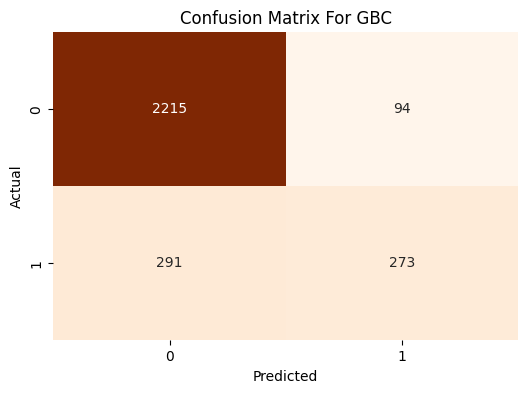

In [31]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix For GBC')
plt.xlabel('Predicted')
plt.ylabel('Actual')

buf = io.BytesIO()  # Create a buffer to save the figure
plt.savefig(buf, format='png')  # Save the current figure to the buffer
plt.show()
plt.close()

# Convert the image buffer to a TensorFlow image
image = tf.image.decode_png(buf.getvalue(), channels=4)
image = tf.expand_dims(image, 0)  # Add the batch dimension

In [32]:
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = 'logs/Models/' + current_time + '_evaluation'
summary_writer = tf.summary.create_file_writer(log_dir)
# Log metrics to TensorBoard
with summary_writer.as_default():
    tf.summary.scalar('Accuracy_GradientBoostingClassifier', accuracy, step=1)
    tf.summary.scalar('AUC-ROC', auc_roc, step=1)
    tf.summary.image('Confusion Matrix', image, step=1)

print(f"TensorBoard logs created at: {log_dir}")

TensorBoard logs created at: logs/Models/20241007-032938_evaluation


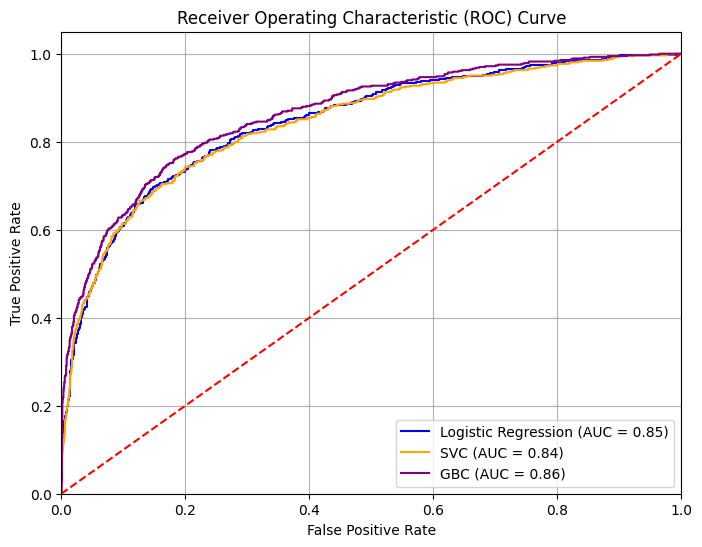

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC for Logistic Regression
fpr_lr2, tpr_lr2, _ = roc_curve(y_test_lr, y_pred_prob_lr2)
roc_auc_lr2 = roc_auc_score(y_test_lr, y_pred_prob_lr2)

# Compute ROC curve and AUC for SVC
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_prob_svc)
roc_auc_svc = roc_auc_score(y_test, y_pred_prob_svc)

# Compute ROC curve and AUC for SVC
fpr_GBC, tpr_GBC, _ = roc_curve(y_test, y_pred_prob)
roc_auc_GBC = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curves
plt.figure(figsize=(8, 6))

# ROC for Logistic Regression
plt.plot(fpr_lr2, tpr_lr2, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr2:.2f})')

# ROC for SVC
plt.plot(fpr_svc, tpr_svc, color='Orange', label=f'SVC (AUC = {roc_auc_svc:.2f})')

# ROC for GBC
plt.plot(fpr_GBC, tpr_GBC, color='Purple', label=f'GBC (AUC = {roc_auc_GBC:.2f})')

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()

plt.show()

In [34]:
from sklearn.metrics import confusion_matrix
y_pred = lr_model.predict(X_test_scaled)

# Compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

tpr = tp / (tp + fn)  # True Positive Rate (Recall)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)

print(f"True Positive Rate (Recall): {tpr:.2f}")
print(f"False Positive Rate: {fpr:.2f}")
print(f"False Negative Rate (Precision): {fnr:.2f}")
print(f"True Negative Rate: {tnr:.2f}")

True Positives (TP): 256
False Positives (FP): 103
True Negatives (TN): 2206
False Negatives (FN): 308
True Positive Rate (Recall): 0.45
False Positive Rate: 0.04
False Negative Rate (Precision): 0.55
True Negative Rate: 0.96


In [37]:
%reload_ext tensorboard
%tensorboard --logdir logs
# run these in terminal to show the board
# tensorboard --logdir=Machine_Learning/logs/Models

Reusing TensorBoard on port 6006 (pid 35256), started 1 day, 2:14:43 ago. (Use '!kill 35256' to kill it.)